#***Image Alignment Using Homography***

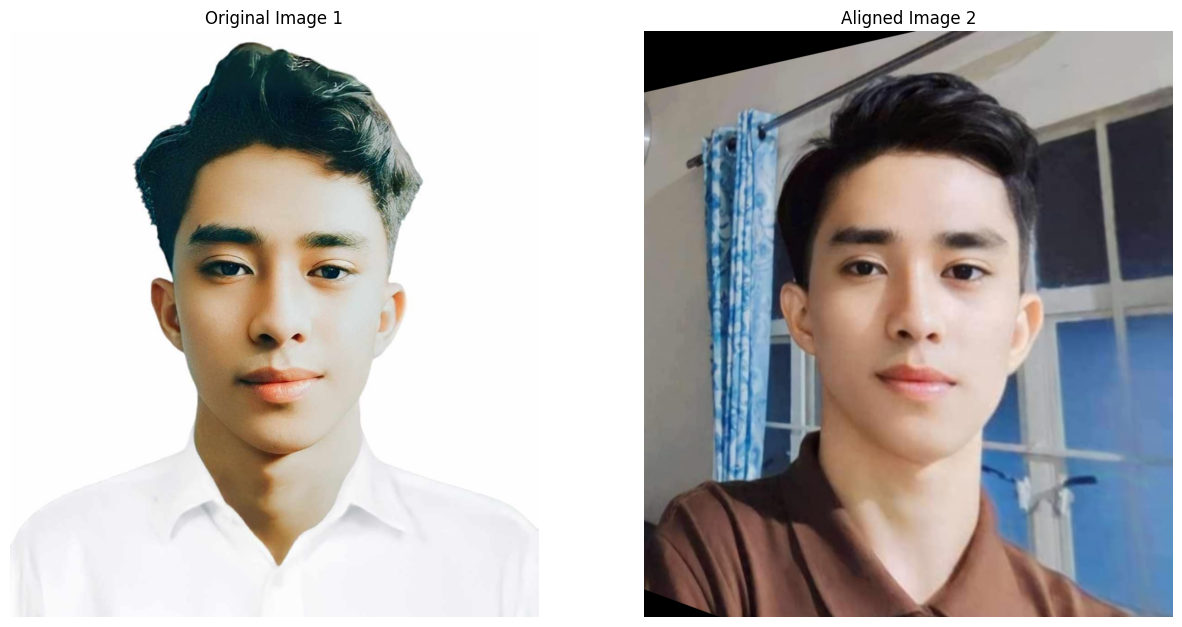

True

In [3]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('original_image1.jpg')  # Reference image
image2 = cv2.imread('original_image2.jpg')  # Image to align

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# FLANN Matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.75 * n.distance:
        good_matches_flann.append(m)

# Extract the matched keypoints' coordinates
points1 = np.zeros((len(good_matches_flann), 2), dtype=np.float32)
points2 = np.zeros((len(good_matches_flann), 2), dtype=np.float32)

for i, match in enumerate(good_matches_flann):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Compute the homography matrix
H, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Warp image2 to align with image1 using the homography matrix
height, width, channels = image1.shape
aligned_image = cv2.warpPerspective(image2, H, (width, height))

# Display the original image and the aligned image
plt.figure(figsize=(15, 10))

# Show the original reference image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

# Show the aligned image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image 2')
plt.axis('off')

plt.show()

# Save the aligned image
cv2.imwrite('aligned_image.jpg', aligned_image)

# Save the warped image (aligned image is the warped image)
cv2.imwrite('warped_image.jpg', aligned_image)  # The warped image is the same as aligned_image
